# Mòdul 4 Part 1

Exercici 1

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
dades_lloguer = pd.read_csv('2023_lloguer_preu_trim.csv')
dades_lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             292 non-null    int64  
 1   Trimestre       292 non-null    int64  
 2   Codi_Districte  292 non-null    int64  
 3   Nom_Districte   292 non-null    object 
 4   Codi_Barri      292 non-null    int64  
 5   Nom_Barri       292 non-null    object 
 6   Lloguer_mitja   292 non-null    object 
 7   Preu            273 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [27]:
dades_lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2023,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),946.8
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1279.5
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),978.7
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),1065.8
4,2023,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),1155.8
...,...,...,...,...,...,...,...,...
287,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),19.2
288,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),11.9
289,2023,2,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.7
290,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),13.2


Per fer el plots ens quedarem amb els subconjunts del tipus de càlcul 'Lloguer_mitja'.

In [88]:
dades_lloguer['Lloguer_mitja'].value_counts()
dades_lloguer['Trimestre'].value_counts()

Trimestre
1    146
2    146
Name: count, dtype: int64

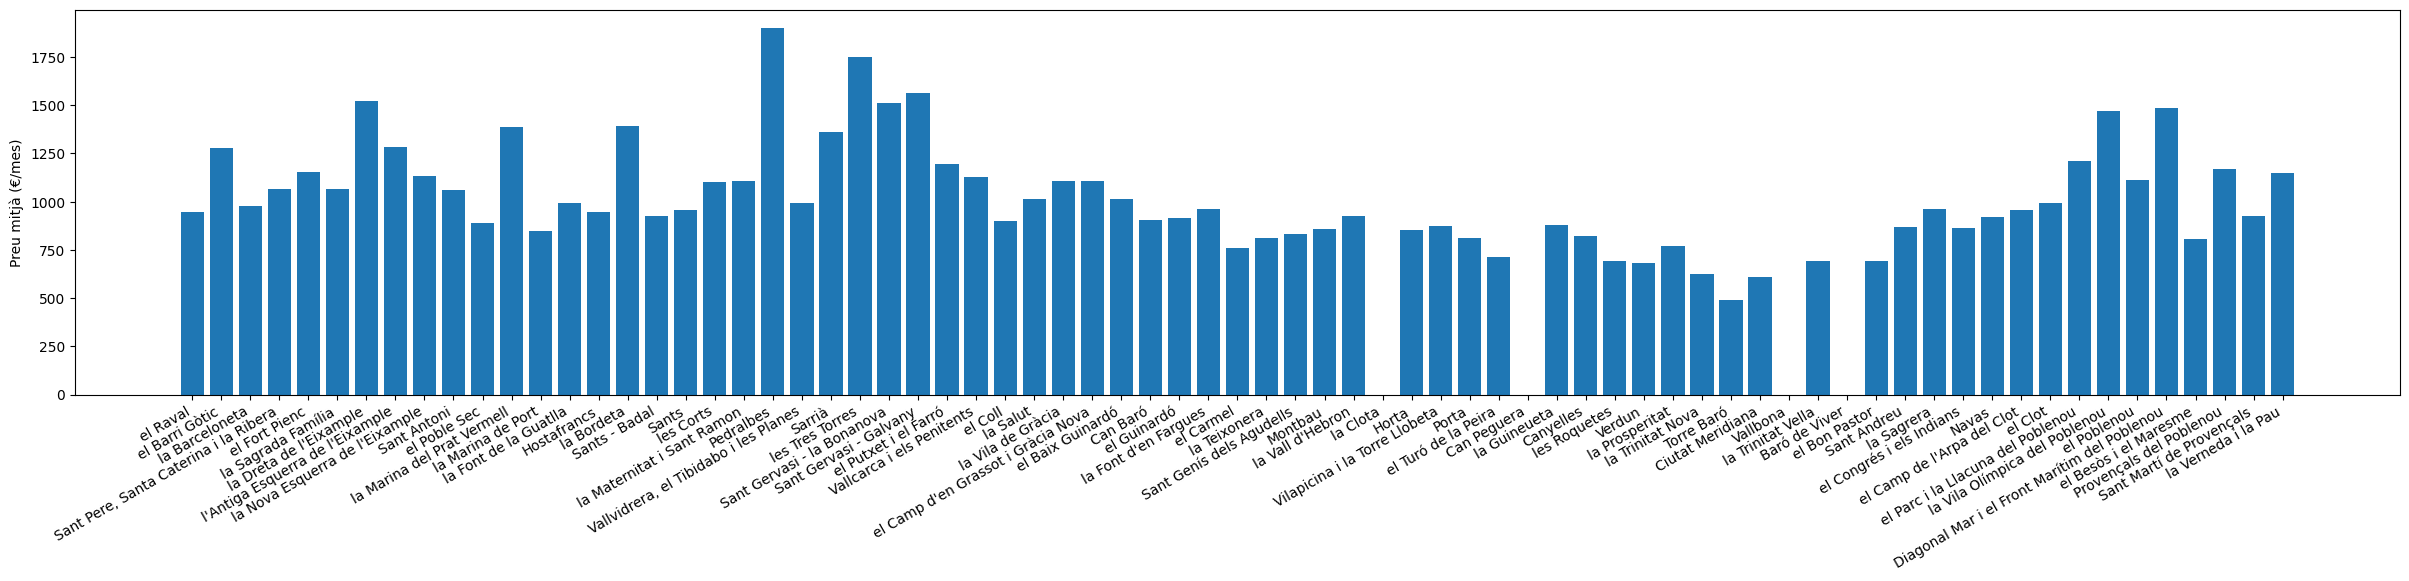

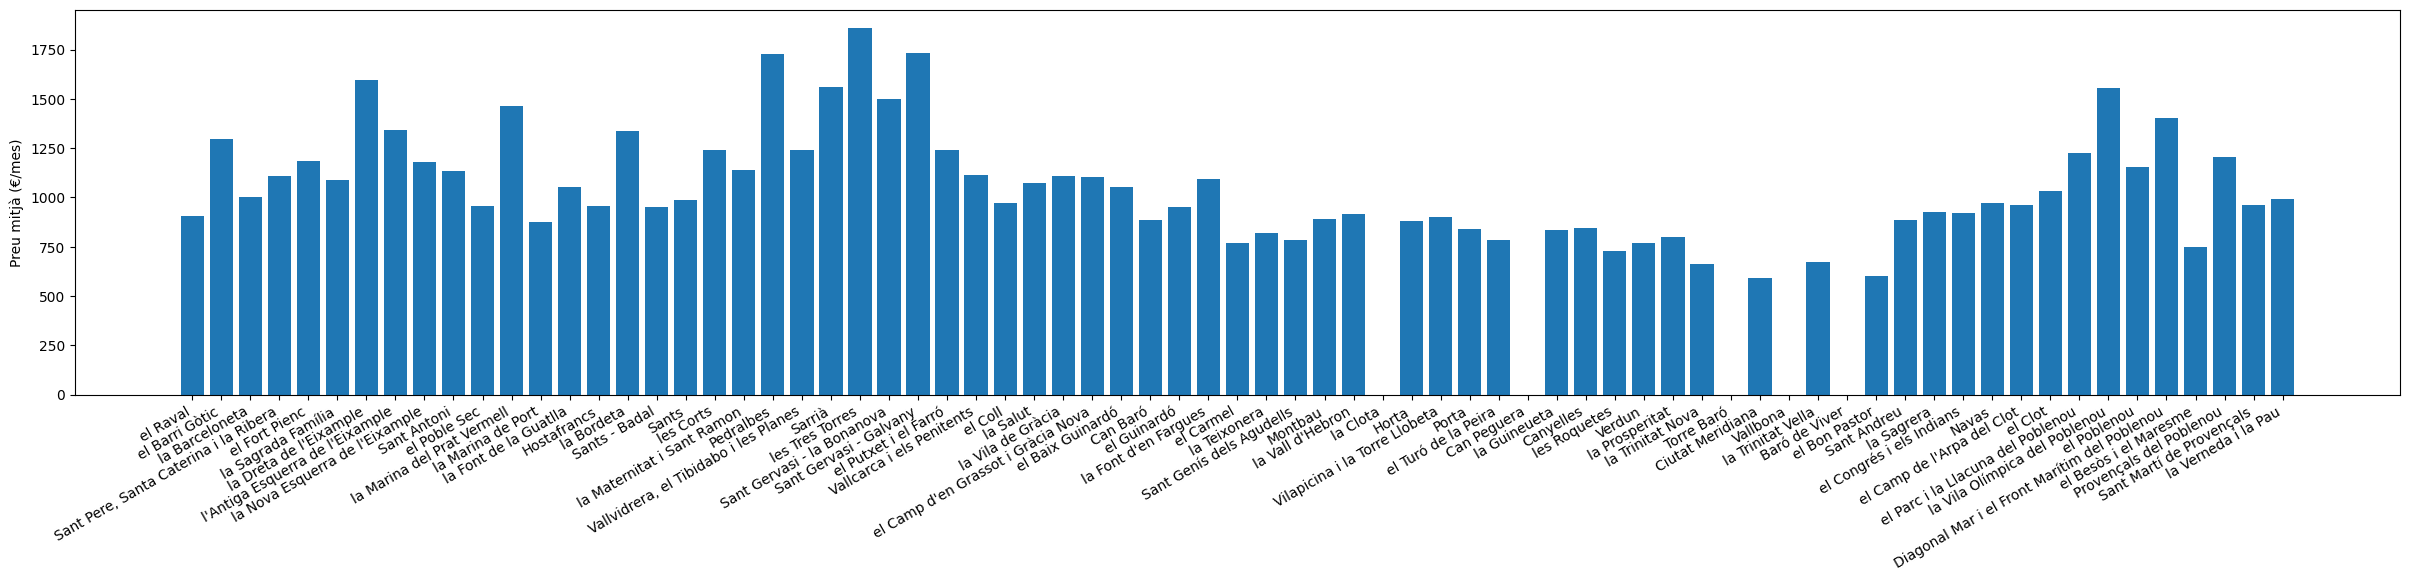

In [95]:
lloguer_total_mes = dades_lloguer[dades_lloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
lloguer_total_mes_1trim = lloguer_total_mes[lloguer_total_mes['Trimestre'] == 1]
lloguer_total_mes_2trim = lloguer_total_mes[lloguer_total_mes['Trimestre'] == 2]

plt.figure(figsize=(30, 5))
plt.bar(lloguer_total_mes_1trim['Nom_Barri'], lloguer_total_mes_1trim['Preu'])
plt.ylabel('Preu mitjà (€/mes)')
plt.xticks(rotation=30, ha='right')

plt.figure(figsize=(30, 5))
plt.bar(lloguer_total_mes_2trim['Nom_Barri'], lloguer_total_mes_2trim['Preu'])
plt.ylabel('Preu mitjà (€/mes)')
plt.xticks(rotation=30, ha='right')

plt.show()

Canvi de preus per districte per trimestre

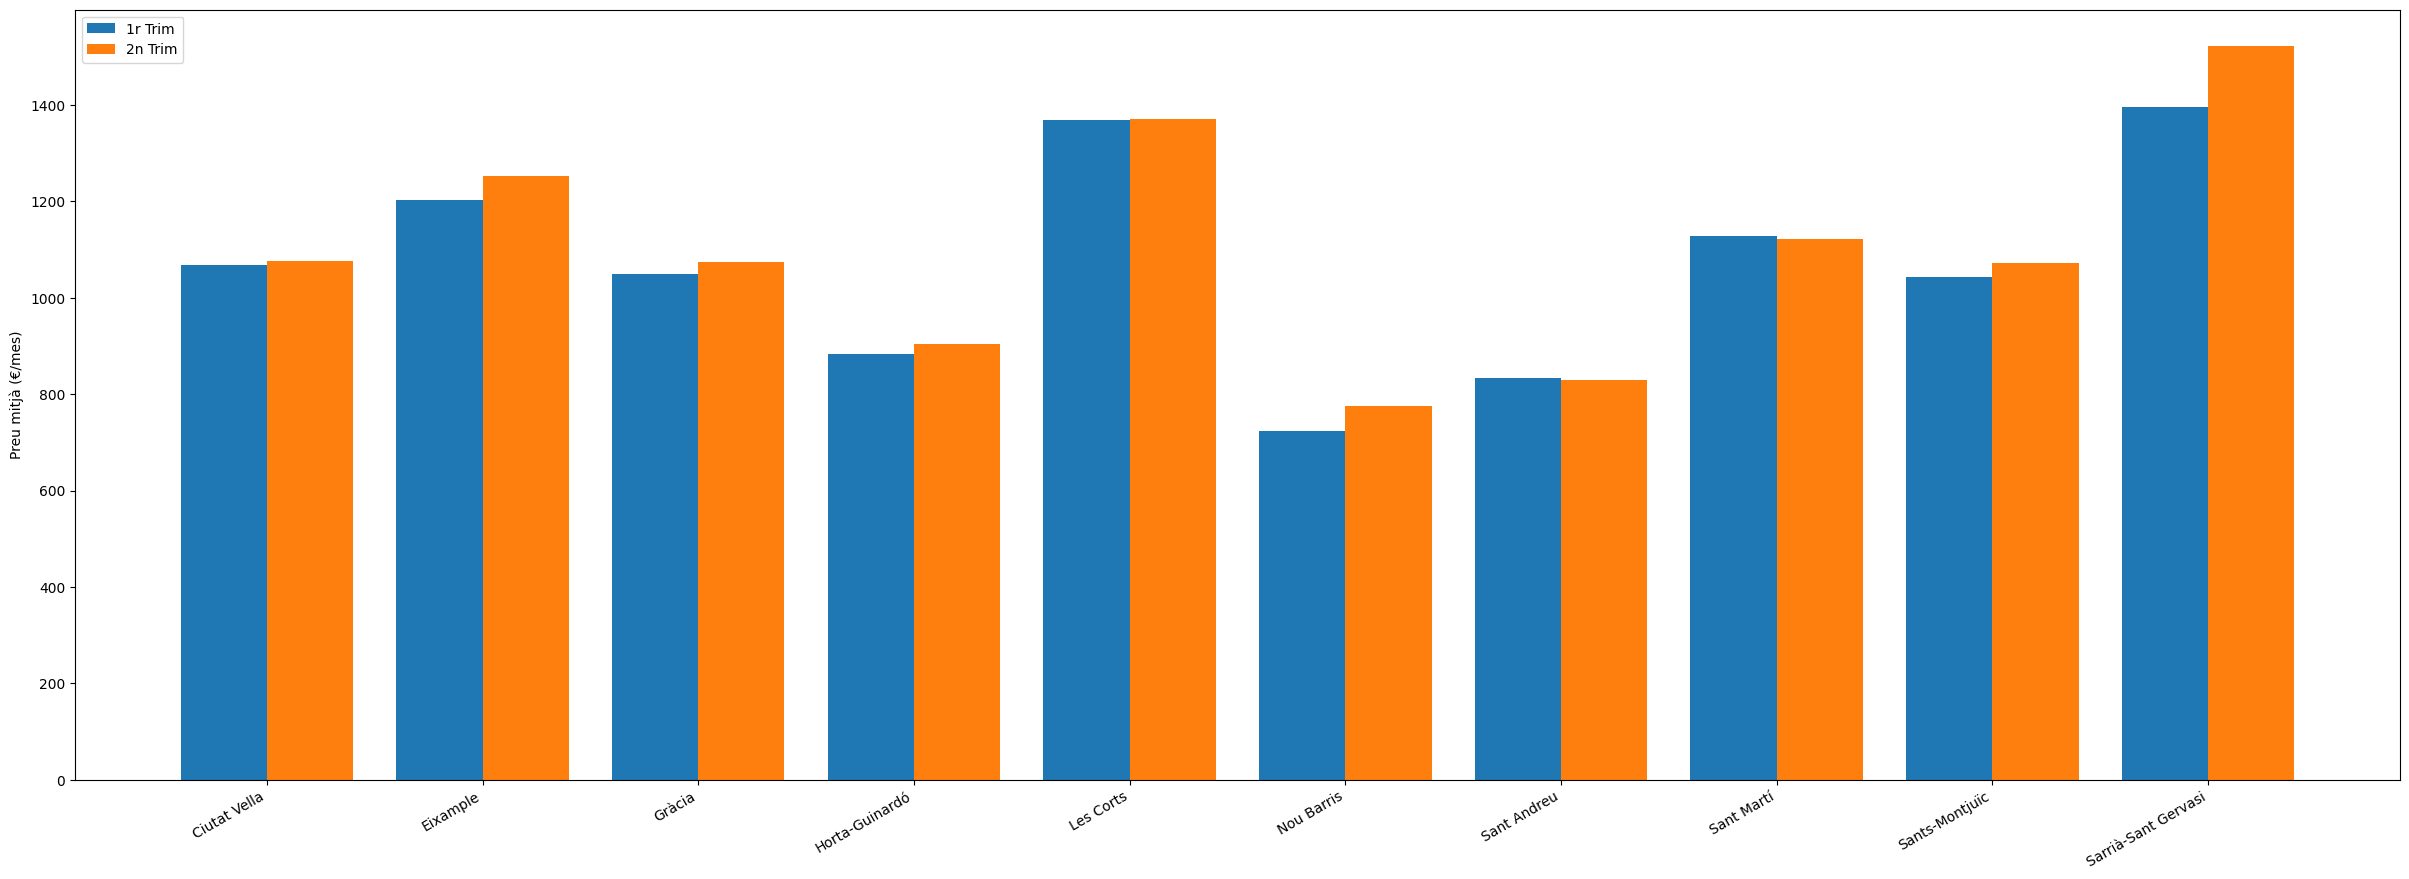

In [127]:
lloguer_districte = lloguer_total_mes_1trim.groupby('Nom_Districte')['Preu'].mean()
plt.figure(figsize=(30, 10))
x = np.arange(lloguer_districte.index.to_numpy().shape[0])
amplada = 0.4

plt.bar(x - amplada/2, lloguer_districte.to_numpy(), width=amplada)

lloguer_districte = lloguer_total_mes_2trim.groupby('Nom_Districte')['Preu'].mean()
plt.bar(x + amplada/2, lloguer_districte.to_numpy(), width=amplada)
plt.ylabel('Preu mitjà (€/mes)')

plt.xticks(x, lloguer_districte.index.to_numpy(), rotation=30, ha='right')
plt.legend(['1r Trim', '2n Trim'], loc='best')

plt.show()